
# The Adult Income dataset

### Description

Title of dataset: adult.csv

Sources:

    * Original owners of database - US Census Bureau
    * Donor of database - Ronny Kohavi and Barry Becker
    * Date received - 05/19/96 
    
Number of Instances

    * 48842 instances, mix of continuous and discrete (train=32561, test=16281)
    * 45222 if instances with unknown values are removed (train=30162, test=15060)
    * Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

Number of Attributes/Fearures/Columns

    * 6 continuous, 8 nominal attributes. 

Attribute Information/Fearures/Columns

    * age: continuous.
    * workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    * fnlwgt: continuous.
    * education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    * education-num: continuous.
    * marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    * occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    * relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    * race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    * sex: Female, Male.
    * capital-gain: continuous.
    * capital-loss: continuous.
    * hours-per-week: continuous.
    * native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
    * income: >50K, <=50K 
    
Missing Values:
     
     7% rows have missing values.

# Objective
## To perform Exploratory Data Analysis(EDA) on the data-set given below:
https://drive.google.com/open?id=17yZ1NSSsRrDF7qfGOJyGHRDDiBce7EQN

# Exploratory Data Analysis:

<b> Importing required librarires:</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

<b>Loading Data on which work is to be done:</b>

In [2]:
data = pd.read_csv('adult.csv')

## <b>1. Taking brief overview of data:</b>

In [3]:
print('First 5 rows:')
data.head()

First 5 rows:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
shape=data.shape
org_row=shape[0] #original rows
org_col=shape[1]  #original columns
print('rows=',org_row)
print('columns=',org_col)

rows= 48842
columns= 15


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Observations_1:

* The 15 parameters on which data is defined can be seen in above table. It contains only two datatypes: object, integer.

<b>Note</b>: The info & shape shows no missing values. But head tells us '?' is used in data to represent missing values. So just to be safe, also look for '-','n/a' while dealing with missing values.
* '?' is one of the representation to show missing values. Hence all the column with missing values should be object type instead of int in the given dataset.
* Hence you will find missing values only in object type columns. Here if we observe object type columns, all are already supposed to be of object datatype only(e.g., race, relation etc.) except for income.
* But that is because we used '>' & '<=' in income.
* Inthe data, no column which is supposed to be int type (like age,educational-num etc.), is of object type (i.e., doesn't have missing values). & we will prove that soon.

<b>1.1 Let's check for missing values</b>

In [6]:
missing_val = ['n/a', '-', '?']

data = pd.read_csv('adult.csv', na_values = missing_val)

data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Observation_2:
* I checked for missing values as '?', '-', 'n/a'. As we can see in head, they changed with NaN.
* Also info proves that only object type columns had missing values & furthermore income wasn't one of them.
* Missing values were in the following columns: workclass, occupation, native-country.
* Workclass & occupation seem to have almost same number of missing values(discrepency of 0.356% only) & this is explored in next cells.

In [8]:
d=data.isnull()
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

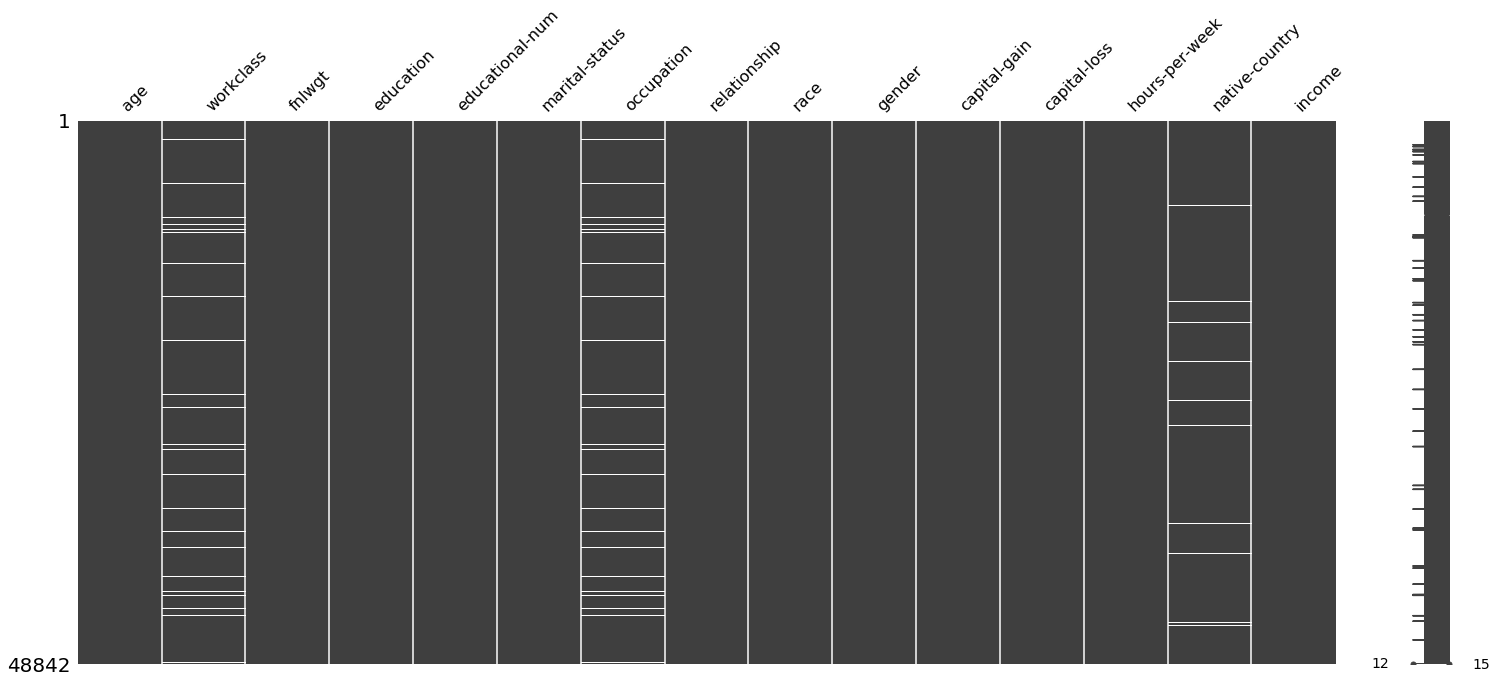

In [9]:
msno.matrix(data)

### Observation_3:
* Workclass & occupation have same pattern of missing values (shown white) & also about the same number of missing values.

In [10]:
ms=d.loc[(d['workclass']==1) & (d['occupation']==1)] #this tells where workclass & occupation, both have missing values.
ms.iloc[:,[1,6]] #just to show that code is working right. I'm more interested in no. of rows

,workclass,occupation
4,True,True
6,True,True
13,True,True
22,True,True
35,True,True
...,...,...
48811,True,True
48812,True,True
48820,True,True
48822,True,True


In [11]:
ms=d.loc[(d['workclass']==0) & (d['occupation']==1)] #this tells where only occupation have missing values
ms.iloc[:,[1,6]].shape

(10, 2)

### Observations_4:
* So the above two cells tells that most people (for missing values) didn't want to share any kind of information about their work. So occupation & workclass were unknown.(total of 2799 such people) [refer first cell in the above two]
* Also the discrepency is because of those people who just shared their workclass but were not comfortable with sharing their actual occupation. (total of 10 such people) [refer last cell from the above two]

In [12]:
#finding the total amount of missing values
missing_values_count = data.isnull().sum()
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

(total_missing/total_cells) * 100

0.8824372466319971

### Observation_5:
* The % of missing data is = 0.88% 

## 2. Handling missing values:

### 2.1 Removing rows with missing values:

In [13]:
data.dropna(axis=0, how='any',inplace= True)

In [14]:
shape_1=data.shape
new_row=shape_1[0]  #new rows
new_col=shape_1[1]  #new columns
print('rows=',new_row)
print('columns=',new_col)

rows= 45222
columns= 15


In [15]:
(org_row-new_row)/org_row*100 #finding % of removed rows

7.411653904426519

### Observation_6:
* Percentage of removed row is 7.41%

### 2.2 removing a non-required column (fnlwgt):

In [16]:
data.drop('fnlwgt',axis=1,inplace=True)

just to show that fnlwgt has been removed

In [17]:
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [18]:
# just saving for further use

data_obstats=data.describe(include='object')
data_stats=data.describe()

# 3. Univariate Analysis:

<b>3.1 Let's start with categorical data:</b>

In [19]:
data_obstats #description of categorical data

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


### Observations_7:
* Most people in the data seems 'dominantly' white, american, males wrt their respective column. Also there are dominantly Private workers.
* Income of most people is <=50k.
* Most people in the data belongs to US.

<b>3.1.1 EDA on above table:</b>

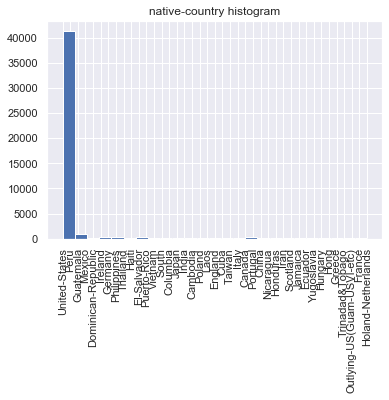

Percentage wise:


United-States                 91.310
Mexico                         1.997
Philippines                    0.626
Germany                        0.427
Puerto-Rico                    0.387
Canada                         0.360
India                          0.325
El-Salvador                    0.325
Cuba                           0.294
England                        0.263
China                          0.250
Jamaica                        0.228
South                          0.223
Italy                          0.221
Dominican-Republic             0.214
Japan                          0.197
Guatemala                      0.190
Vietnam                        0.184
Columbia                       0.181
Poland                         0.179
Haiti                          0.153
Portugal                       0.137
Iran                           0.124
Taiwan                         0.122
Greece                         0.108
Nicaragua                      0.106
Peru                           0.100
E

In [20]:
#just plotting one graph to show how it will look like
sns.set()
plt.hist(data['native-country'],bins=25)
plt.xticks(rotation='vertical')
plt.title('native-country histogram')
plt.show()
print('Percentage wise:')
data['native-country'].value_counts(1).apply(lambda i:round(i*100,3))

### Observations_8:
* The data is from US Census Bureau. This means it is from US. So from the given data we can tell that about 8.69% people are emigrant/immigrant for US.
* 91.310% people in the data are from US.

[Text(0, 0, '<=50K'), Text(0, 0, '>50K')]

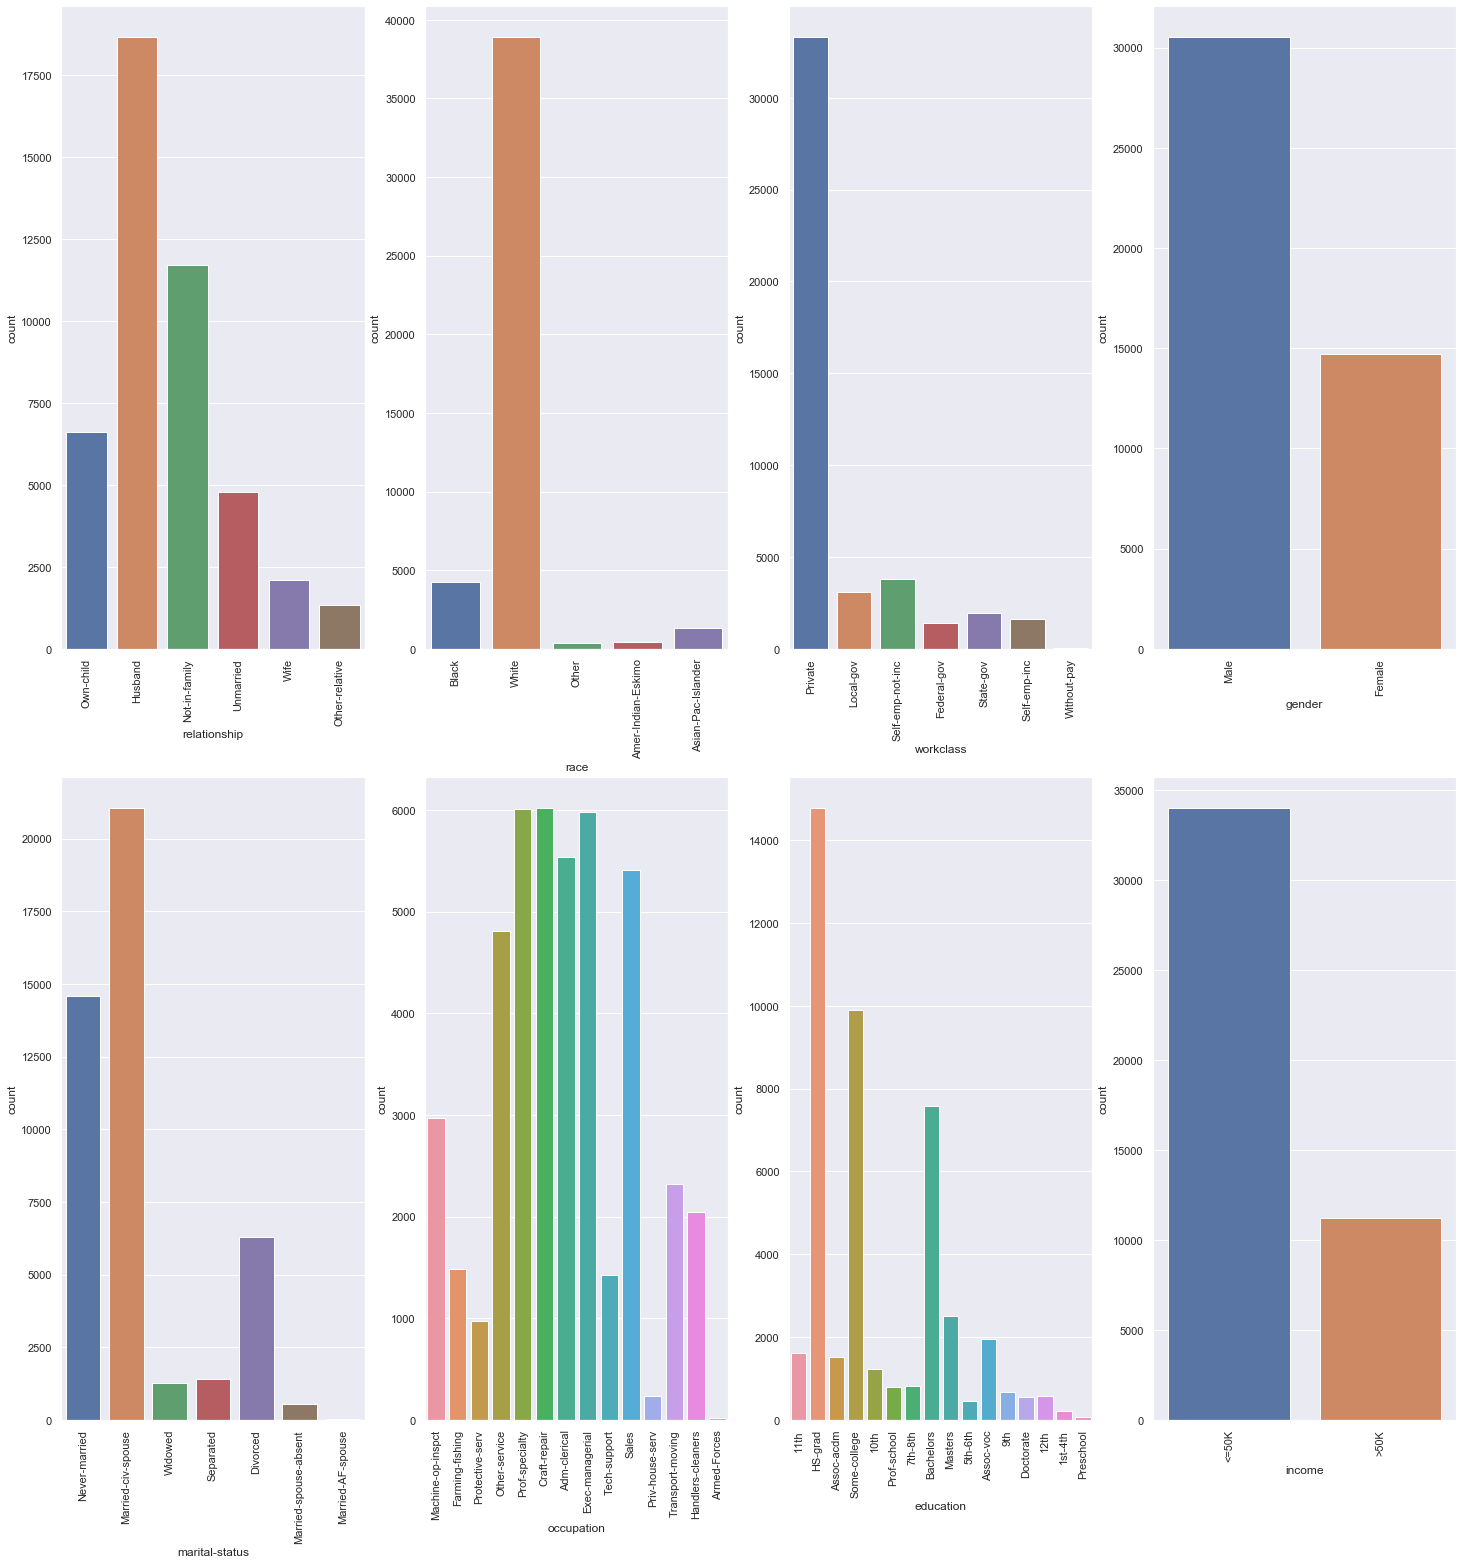

In [21]:
f, axes = plt.subplots(2, 4, figsize=(25,26))
chart_1=sns.countplot(data["relationship"],ax=axes[0, 0])
chart_2=sns.countplot(data["race"],ax=axes[0, 1])
chart_3=sns.countplot(data["workclass"], ax=axes[0, 2])
chart_4=sns.countplot(data["gender"],ax=axes[0, 3])
chart_5=sns.countplot(data["marital-status"],ax=axes[1, 0])
chart_6=sns.countplot(data["occupation"],ax=axes[1, 1])
chart_7=sns.countplot(data["education"],ax=axes[1, 2])
chart_8=sns.countplot(data["income"],ax=axes[1, 3])

# setting xticks

chart_1.set_xticklabels(chart_1.get_xticklabels(), rotation=90)
chart_2.set_xticklabels(chart_2.get_xticklabels(), rotation=90)
chart_3.set_xticklabels(chart_3.get_xticklabels(), rotation=90)
chart_4.set_xticklabels(chart_4.get_xticklabels(), rotation=90)
chart_5.set_xticklabels(chart_5.get_xticklabels(), rotation=90)
chart_6.set_xticklabels(chart_6.get_xticklabels(), rotation=90)
chart_7.set_xticklabels(chart_7.get_xticklabels(), rotation=90)
chart_8.set_xticklabels(chart_8.get_xticklabels(), rotation=90)

### Observations_9:
From plots, some interesting patterns seem to be present. Like,
* Most peoples are white. (seems reasonable as 91.31% people are from US.)
* Most people are from private workclass. (also seems reasonable as US focuses more on privatization & the data does show that.)
* Male datapoints are almost double of female datapoints.
* Private house service is least famous occupation. While craft-repair,Prof-specialty, Exec-managerial, Adm=clerical & sales are top 5 occupations.
* Most people have either HS-grad, some-college or Bachelors' level of education.
* Most people earn <=50k.

<b>3.1.2 Let's see it lil mathematically:</b>

In [22]:
count_income=data['income'].value_counts(1).apply(lambda i:round(i*100,3))
count_edu=data['education'].value_counts(1).apply(lambda i:round(i*100,3))
count_race=data['race'].value_counts(1).apply(lambda i:round(i*100,3))
count_workclass=data['workclass'].value_counts(1).apply(lambda i:round(i*100,3))
count_occup=data['occupation'].value_counts(1).apply(lambda i:round(i*100,3))
display('occupation distribution:',count_occup,'workcalss distribution:',count_workclass,'Racial distribution:',count_race,'Income distribution:',count_income,'education level districution:', count_edu)

'occupation distribution:'

Craft-repair         13.312
Prof-specialty       13.286
Exec-managerial      13.232
Adm-clerical         12.251
Sales                11.959
Other-service        10.632
Machine-op-inspct     6.568
Transport-moving      5.121
Handlers-cleaners     4.524
Farming-fishing       3.273
Tech-support          3.140
Protective-serv       2.158
Priv-house-serv       0.513
Armed-Forces          0.031
Name: occupation, dtype: float64

'workcalss distribution:'

Private             73.652
Self-emp-not-inc     8.394
Local-gov            6.855
State-gov            4.303
Self-emp-inc         3.640
Federal-gov          3.109
Without-pay          0.046
Name: workclass, dtype: float64

'Racial distribution:'

White                 86.027
Black                  9.349
Asian-Pac-Islander     2.881
Amer-Indian-Eskimo     0.962
Other                  0.781
Name: race, dtype: float64

'Income distribution:'

<=50K    75.216
>50K     24.784
Name: income, dtype: float64

'education level districution:'

HS-grad         32.690
Some-college    21.890
Bachelors       16.740
Masters          5.559
Assoc-voc        4.332
11th             3.580
Assoc-acdm       3.332
10th             2.704
7th-8th          1.820
Prof-school      1.736
9th              1.495
12th             1.276
Doctorate        1.203
5th-6th          0.993
1st-4th          0.491
Preschool        0.159
Name: education, dtype: float64

### Observations_10:
* The top 5 occupation distribution (total of 64.04%) is as follows:

Craft-repair         13.312%

Prof-specialty       13.286%

Exec-managerial      13.232%

Adm-clerical         12.251%

Sales                11.959%
* Private workclass dominates with 73.652% people.
* 86.027% are white people.
* 75.216% people earn <=50k.
* Education level of most people is either HS-grad, some-college or Bachelors(all accounts for a total of 71.32%). The distribution is as follows:

HS-grad: 32.690%

Some-college: 21.890%

Bacelors: 16.740%

<b>3.2 Let's move onto numerical data:</b>

In [23]:
data_stats # just to have a brief description

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


### Observations_11:
* The IQR range of each data is shown in table. The upper limit is at 75% while lower limit is at 25%. Max & min Values are also shown for each numerical column.
* The whole IQR range for capital-gain & capital-loss is zero. The max value for that matter is definitely an outlier. (For rest data we'll explore in a while.)
* Avg age of people in this data is about 38 years. Also avg working hours is about 41 hr/week. (Although some people seem to work even for 99 hrs.)

<b>3.2.1 Let's see their probability distribution:</b>

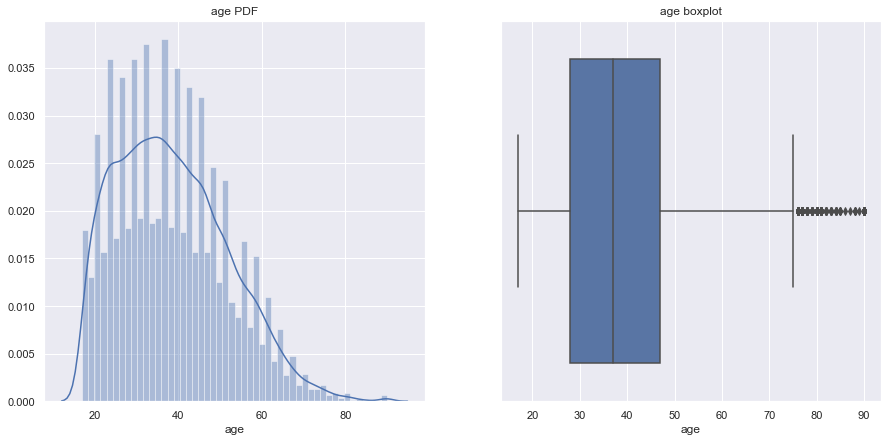

In [24]:
#for age
f, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
plt.title('age PDF')
sns.distplot(data['age'], hist=True, rug=False)
plt.subplot(1,2,2)
plt.title('age boxplot')
sns.boxplot(data['age'])

### Observations_12:
* Most people lie between 28-47(depicted in boxplot & proved by data_stats earlier) in the dataset. Also peak number of people is in age of 30-40.
* people with age above 75 are outlier in this dataset as shown in boxplot.
* The histogram shows frequency distribution of age.

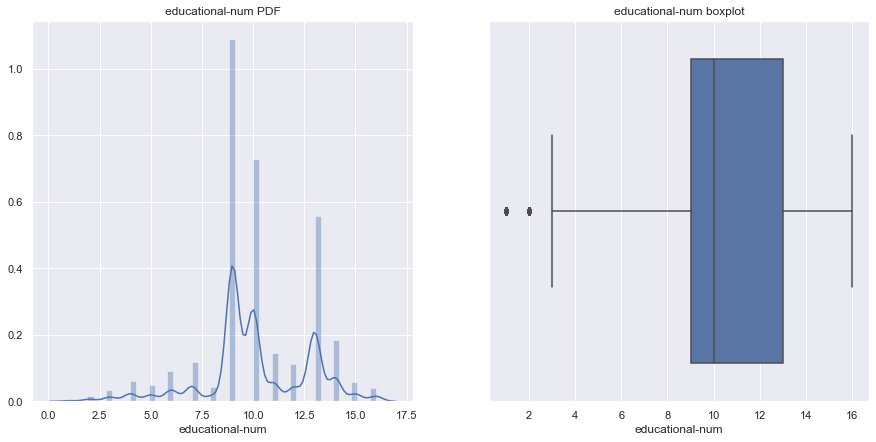

In [25]:
#for educational-num
f, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
plt.title('educational-num PDF')
sns.distplot(data['educational-num'], hist=True, rug=False)
plt.subplot(1,2,2)
plt.title('educational-num boxplot')
sns.boxplot(data['educational-num'])

### Observation_13:
* education-num is just a numeric representation of the attribute education. The three peaks may indicate HS-grad, some-college & bachelors' data (top 3 educations).
* People with about less than 3 educational-num are outliers.
* Most people have educational-num 9-13(refer above boxplot & data_stats)
* The histogram shows frequency distribution of educational-gp (matches peak)

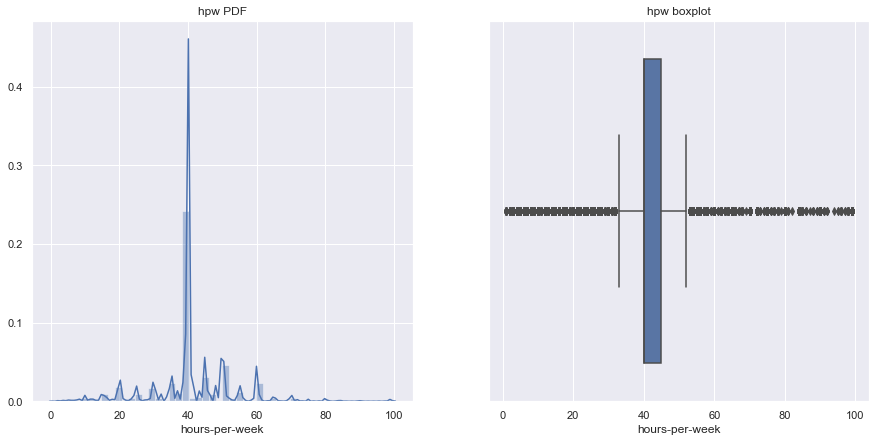

In [26]:
#for hrs/week
f, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
plt.title('hpw PDF')
sns.distplot(data['hours-per-week'], hist=True, rug=False)
plt.subplot(1,2,2)
plt.title('hpw boxplot')
sns.boxplot(data['hours-per-week'])

### Observation_14:
* Most people work 40hr/week. Considering 5 working days a week, this comes down to 8hr per working day. This is quite a std office time. So having a peakaround 40hr is quite reasonable.
* Some people work less than 40 while some above 40. Maybe because either their job doesn't allow the std time or they are probably not doing a usual private or federal job (like some peple are self-emp). So working hrs vary.
* The IQR range is 40 to 45 hrs(also depicted by boxplot). Outliers seem to lie before 25hrs & after about 51hrs or something like that.
* The histogram shows frequency distribution of hpw (matches peak)

# 4. Bivariate Analysis:

Let's start with lilttle description so that we have everything infront of us.

In [27]:
data_des=data.describe(include='all')
data_des

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,45222.000000,45222,45222,45222.000000,45222,45222,45222,45222,45222,45222.000000,45222.000000,45222.000000,45222,45222
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33307,14783,NaN,21055,6020,18666,38903,30527,NaN,NaN,NaN,41292,34014
mean,38.547941,NaN,NaN,10.118460,NaN,NaN,NaN,NaN,NaN,1101.430344,88.595418,40.938017,NaN,NaN
std,13.217870,NaN,NaN,2.552881,NaN,NaN,NaN,NaN,NaN,7506.430084,404.956092,12.007508,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


<b>4.1 Income ditribution based upon gender:</b>

In [28]:
print('Percentage of males & females:')
data['gender'].value_counts(1).apply(lambda i:round(i*100,3))

Percentage of males & females:


Male      67.505
Female    32.495
Name: gender, dtype: float64

Percentage distribution of income for each gender:


income,<=50K,>50K
gender,,
Female,88.642395,11.357605
Male,68.752252,31.247748


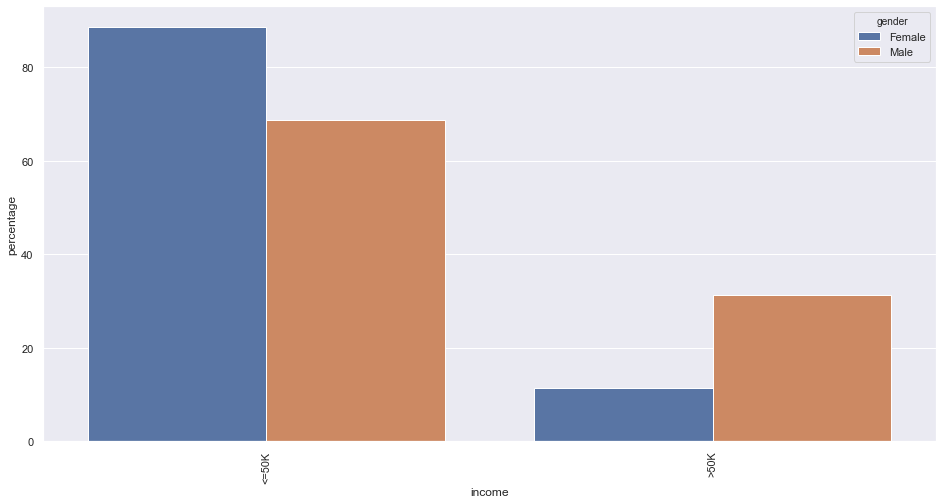

In [29]:
plt.figure(figsize=(16, 8))
gp_gen=data.groupby(['gender'])['income']
workclass_counts = (gp_gen.value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('income'))
chart = sns.barplot(x="income", y="percentage", hue="gender", data=workclass_counts)
_ = plt.setp(chart.get_xticklabels(), rotation=90)
print('Percentage distribution of income for each gender:')
pd.crosstab(data.gender,data.income,normalize='index').apply(lambda i:i*100)

### Observations_15:
* The graph shows the Percentage distribution of income for each gender.
* Table tells us that out of all the females, only 11.357% makes more than 50k while the % of male for that matter is 31.247% (% of males is higher by about a factor 2.75). We just want to know why this kind of difference in % distribution of income for each gender.
* One may propose the reason could be less education level of females in that time(1996). Let's check for that:

Text(0.5, 1.0, 'Education level of Each gender for whole age range')

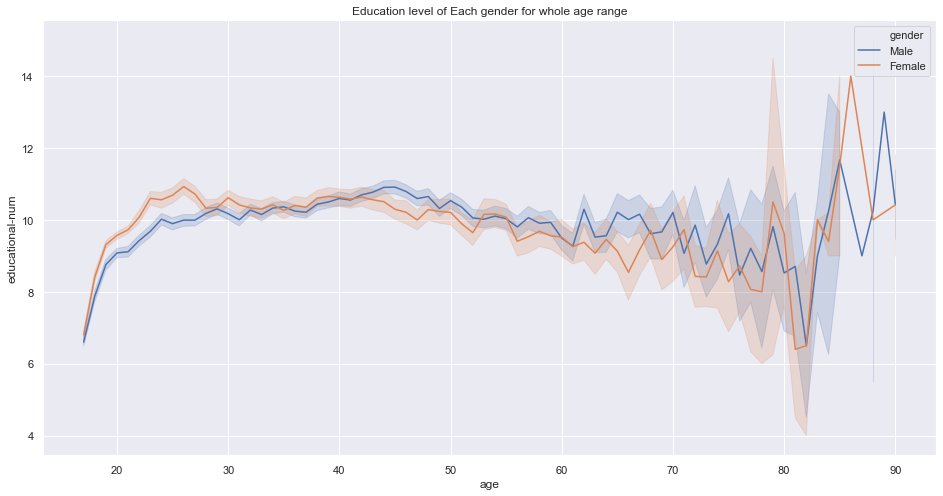

In [30]:
plt.figure(figsize=(16, 8))
sns.lineplot(x = 'age', y = 'educational-num', hue='gender', data = data)
plt.title('Education level of Each gender for whole age range')

### Observations_16:
* The graph shows that the education level of male & female is about same (that too for every age). So that can't be the reason of difference in % distribution of income for each gender.
* Let's check if females worked less.

Text(0.5, 1.0, 'hrs/week given by each gender for whole age range')

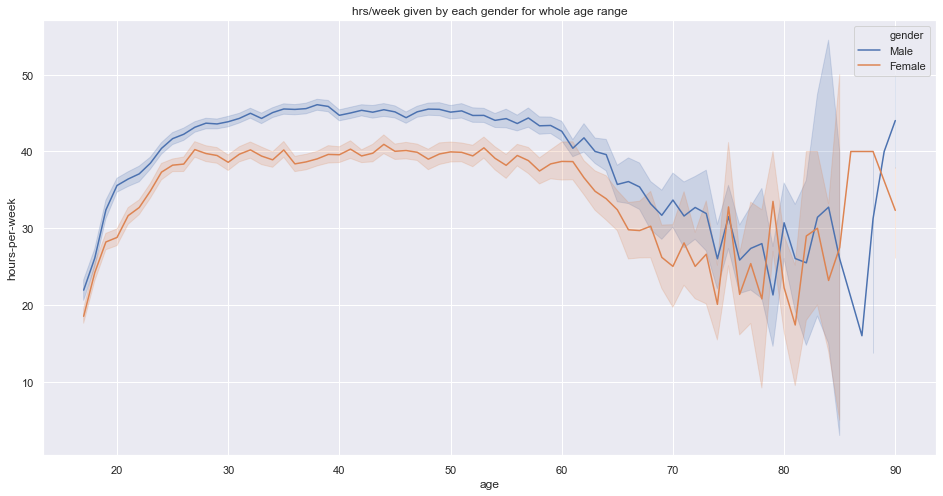

In [31]:
plt.figure(figsize=(16, 8))
sns.lineplot(x = 'age', y = 'hours-per-week', hue='gender', data = data)
plt.title('hrs/week given by each gender for whole age range')

### Observation_17:
* It may seem that the difference in income is due to difference in working hours. But the difference is less than 3-4 hrs a week on avg (even if we count the before the age of 75). Or say less than 1hr per working day. So working hours also doesn't seem to be plausible reason for difference in % distribution of income for each gender.
* Also middle aged people(30-60) seem to work more.
* Let's check if the difference in % distribution of income for each gender is due to a different distribution of workclass for each gender.

% distribution of workclass for each gender:


workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
gender,,,,,,,
Female,3.028241,8.465464,77.767948,1.354202,4.198707,5.137802,0.047635
Male,3.148033,6.079864,71.670980,4.740066,10.413732,3.901464,0.045861


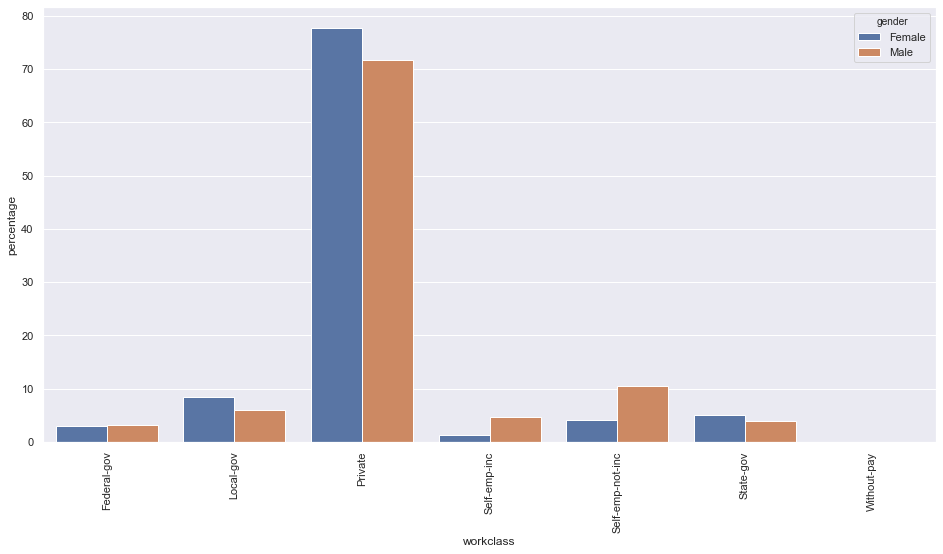

In [32]:
plt.figure(figsize=(16, 8))
gp_gen=data.groupby(['gender'])['workclass']
workclass_counts = (gp_gen.value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('workclass'))
chart = sns.barplot(x="workclass", y="percentage", hue="gender", data=workclass_counts)
_ = plt.setp(chart.get_xticklabels(), rotation=90)
print('% distribution of workclass for each gender:')
pd.crosstab(data.gender,data.workclass).apply(lambda i:i*100/i.sum(),axis=1)

### Observation_18:
* The distribution pattern for both, male & female, looks about the same in each workclass.

% distribution of workclass based upon income:


workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
income,,,,,,,
<=50K,2.519551,6.423825,76.603751,2.157935,8.046687,4.192391,0.055859
>50K,4.898287,8.163812,64.694861,8.137045,9.448608,4.639543,0.017844


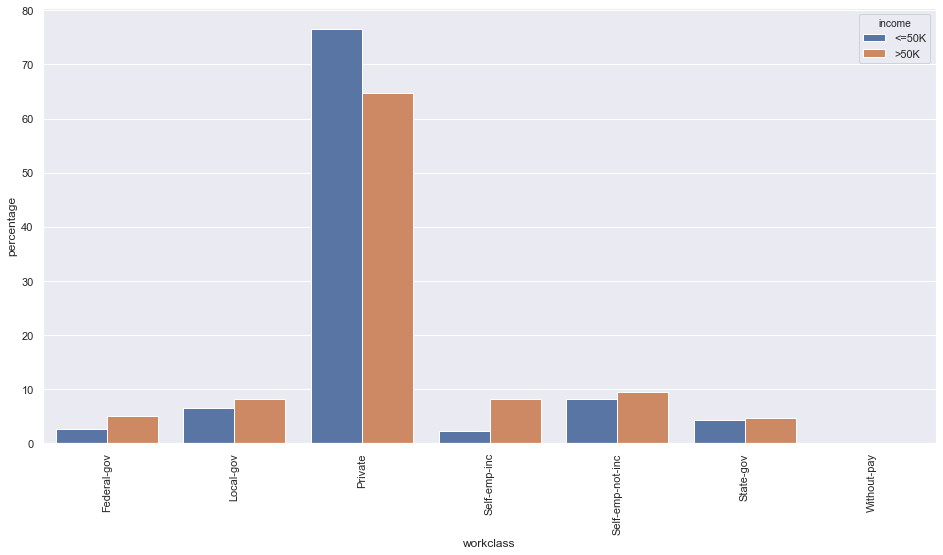

In [33]:
plt.figure(figsize=(16, 8))
gp_in=data.groupby(['income'])['workclass']
workclass_counts = (gp_in.value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('workclass'))
chart = sns.barplot(x="workclass", y="percentage", hue="income", data=workclass_counts)
_ = plt.setp(chart.get_xticklabels(), rotation=90)
print('% distribution of workclass based upon income:')
pd.crosstab(data.income,data.workclass).apply(lambda i:i*100/i.sum(),axis=1)

### Observations_19:
* All workclasses seem to provide equal % of oppotunities for >50k & <=50k.
* Now as we know females have same level of education, works same hours-per-week, have similar workclass distribution as man. In addition to that the above graph also shows that income opportunities should be equal. But even after that males dominate in >50k income quota by factor of ~2.75.

Note: Maybe that's a case of gender discrimination (also in 1996 it was more profound than today). Most of the >50k jobs were occupied by men (even from the point of view of % for each gender).

<b>4.2 Relation between inome & marital-status:</b>

% distribution of income for each marital-status:


income,<=50K,>50K
marital-status,,
Divorced,16.587288,5.844040
Married-AF-spouse,0.052919,0.124911
Married-civ-spouse,33.783148,85.331906
Married-spouse-absent,1.464103,0.481799
Never-married,40.856706,6.254461
Separated,3.857235,0.883298
Widowed,3.398601,1.079586


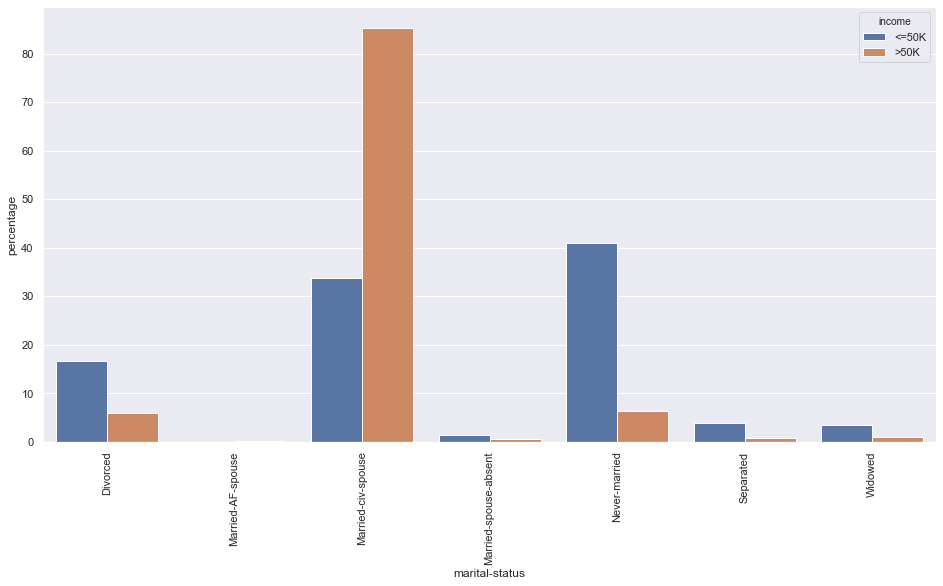

In [34]:
plt.figure(figsize=(16, 8))
gp_in=data.groupby(['income'])['marital-status']
ms_counts = (gp_in.value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('marital-status'))
chart = sns.barplot(x="marital-status", y="percentage", hue="income", data=ms_counts)
_ = plt.setp(chart.get_xticklabels(), rotation=90)
print('% distribution of income for each marital-status:')
pd.crosstab(data['marital-status'],data.income).apply(lambda i:i*100/i.sum(),axis=0)

### Observations_20:
* The table shows that most people(85.33%) who earn more than 50k are married-civ-spouse (probably because they are well settled & have a family to feed).
* Also most people with <=50k income are bachelors (probably because they are new to the job & haven't settled yet).
* The graph shows also shows the same data & satisfies the observation.

<b>4.3 Relation of income with education level:</b>

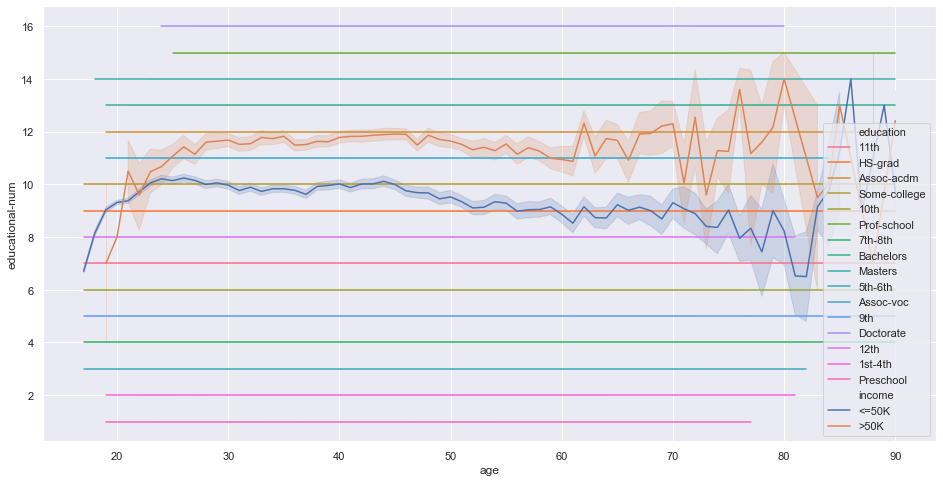

In [35]:
plt.figure(figsize=(16, 8))
sns.lineplot(x = 'age', y = 'educational-num', hue='education', data = data)
sns.lineplot(x = 'age', y = 'educational-num', hue='income', data = data)

### Observations_21:
* The background lines (horizontal) just show education level corresponding to educational-num, e.g., 9 & 12 on doing the color coding gives HS-grad & Assoc-acdm respectively (quite a huge gap just for 3pts).
* It is clear from the graph that almost all people with salary >50k are having higher education than their counterpart.

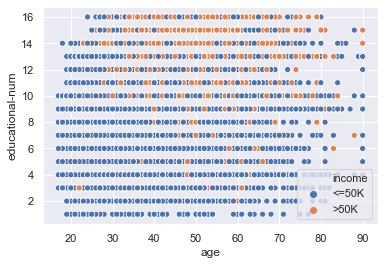

In [36]:
sns.scatterplot(x = 'age', y = 'educational-num', hue='income', data = data)

### Observation_22:
* In addition to previous observation above graph also seem to dictate that most people with salary >50k are between 35-60yrs old.
* Also all the education levels (from this dataset) are achievable by about age of 25.

<b>4.4 Preffered occupation by each gender:</b>

% distribution of occupation chosen by each gender:


occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
gender,,,,,,,,,,,,,,
Female,25.382783,0.000000,2.143586,11.731882,0.646478,1.721674,5.396393,17.978904,1.483498,14.991494,0.830214,13.072474,3.769990,0.850629
Male,5.929177,0.045861,18.688374,13.954860,4.536967,5.873489,7.131392,7.095358,0.045861,12.464376,2.797524,11.422675,2.836833,7.177253


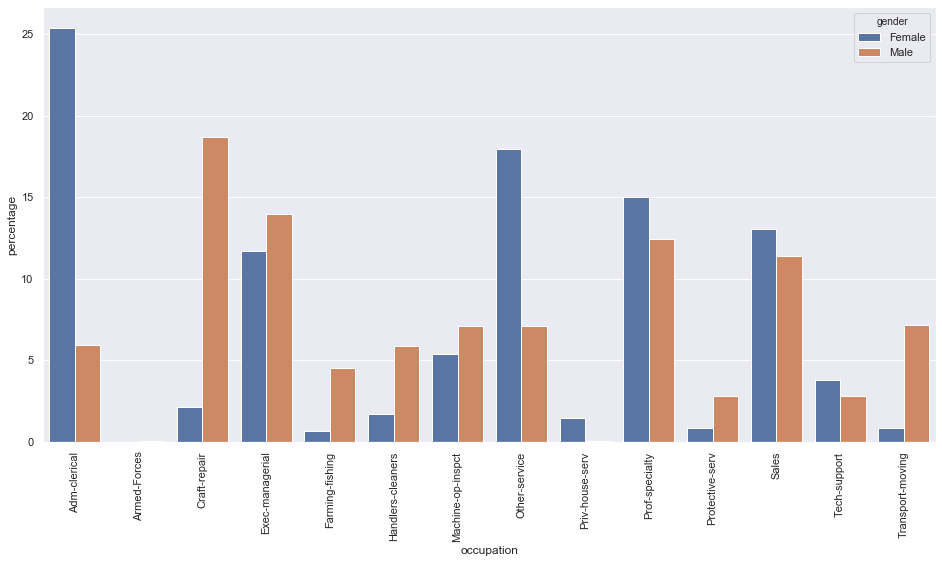

In [37]:
plt.figure(figsize=(16, 8))
gp_gen=data.groupby(['gender'])['occupation']
occp_counts = (gp_gen.value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('occupation'))
chart = sns.barplot(x="occupation", y="percentage", hue="gender", data=occp_counts)
_ = plt.setp(chart.get_xticklabels(), rotation=90)
print('% distribution of occupation chosen by each gender:')
pd.crosstab(data.gender,data.occupation,normalize='index').apply(lambda i:i*100)

### Observations_23:
* The data shows % distribution of occupations for each gender.e.g., About 25.383% (i.e., little over 1/4th part)  of the femlaes work as Adm-clerical & that is 4-5 times more than males.
* Gender % wise they both gender have about same weightage on Exec-managerial,Prof-speciality & Sales occupation.

If we talk about count for each:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

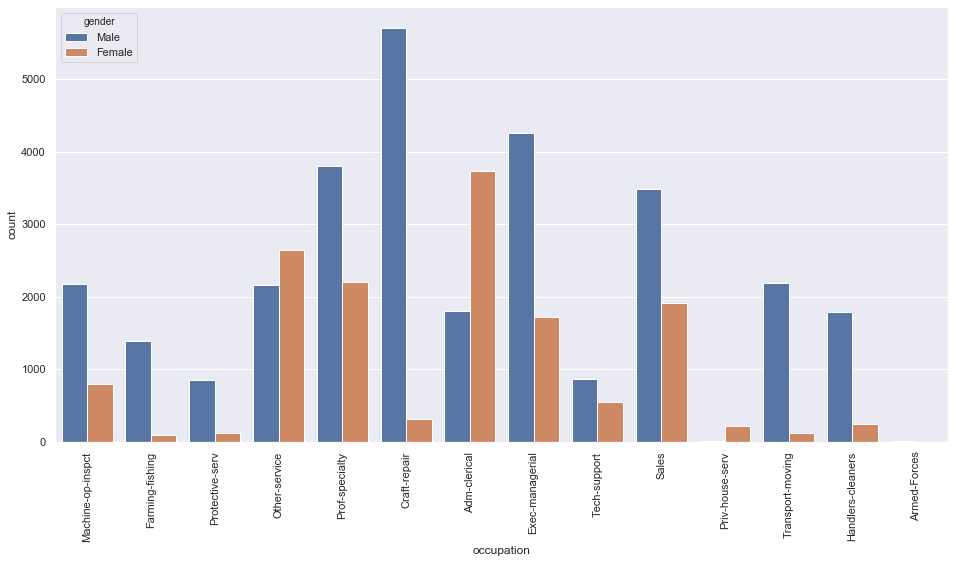

In [38]:
plt.figure(figsize=(16,8))
sns.countplot(data['occupation'],hue=data['gender'])
plt.xticks(rotation='vertical')

### Observations_24:
* Count showed us that having same % weightage for each gender doesn't mean same count/datapoints. As the graph suggests, the closest when both gender had equal datapoints in an occupation was in Other-service or Tech-support.
* Most males work as Craft-repair person while most females as Adm-clerical.

% distribution of occupation based upon income:


occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
income,,,,,,,,,,,,,,
<=50K,14.064797,0.029400,13.714941,9.163874,3.845475,5.618275,7.658611,13.559123,0.673252,9.713647,1.966837,11.621685,2.966426,5.403657
>50K,6.745182,0.035689,12.089579,25.579943,1.534618,1.204497,3.256602,1.748751,0.026767,24.125625,2.739115,12.981799,3.667024,4.264811


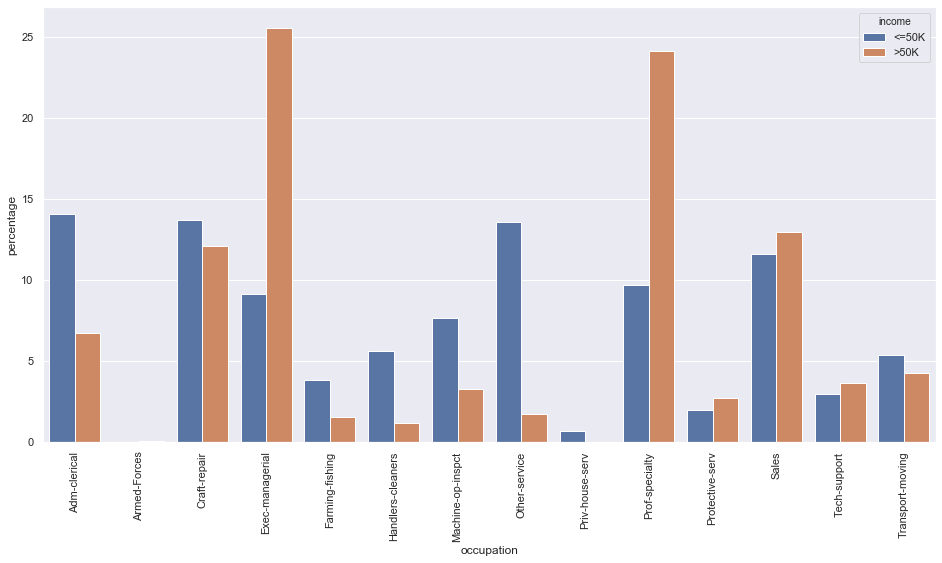

In [39]:
plt.figure(figsize=(16, 8))
gp_in=data.groupby(['income'])['occupation']
occp_counts = (gp_in.value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('occupation'))
chart = sns.barplot(x="occupation", y="percentage", hue="income", data=occp_counts)
_ = plt.setp(chart.get_xticklabels(), rotation=90)
print('% distribution of occupation based upon income:')
pd.crosstab(data.income,data.occupation,normalize='index').apply(lambda i:i*100)

### Observation_25:
* Exec-managerial & Prof-speciality gives >50k to about 70% of its people. Pays really well!!

<b>4.4 Distribution of occupation in each workclass</b>

% distribution of occupation based upon workclass:


occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,34.566145,0.995733,6.543385,18.847795,0.640114,2.489331,1.351351,3.840683,0.00000,16.998578,3.271693,1.209104,6.685633,2.560455
Local-gov,13.419355,0.000000,6.709677,10.612903,1.387097,2.064516,0.709677,9.516129,0.00000,33.677419,14.483871,0.516129,1.870968,5.032258
Private,12.462846,0.000000,14.057105,11.811331,1.990573,5.701504,8.514727,11.862371,0.69655,9.937851,0.882697,13.132375,3.398685,5.551386
Self-emp-inc,2.673147,0.000000,9.599028,36.452005,4.981774,0.364520,0.850547,2.551640,0.00000,14.702309,0.303767,24.726610,0.546780,2.247874
Self-emp-not-inc,1.817703,0.000000,20.706006,15.121180,17.149631,0.553214,1.527924,7.218124,0.00000,14.805058,0.184405,15.121180,1.106428,4.689146
State-gov,19.064748,0.000000,4.779034,14.439877,1.233299,0.976362,0.976362,9.763618,0.00000,31.397739,8.992806,0.976362,4.367934,3.031860
Without-pay,14.285714,0.000000,4.761905,4.761905,38.095238,9.523810,9.523810,9.523810,0.00000,0.000000,0.000000,4.761905,0.000000,4.761905


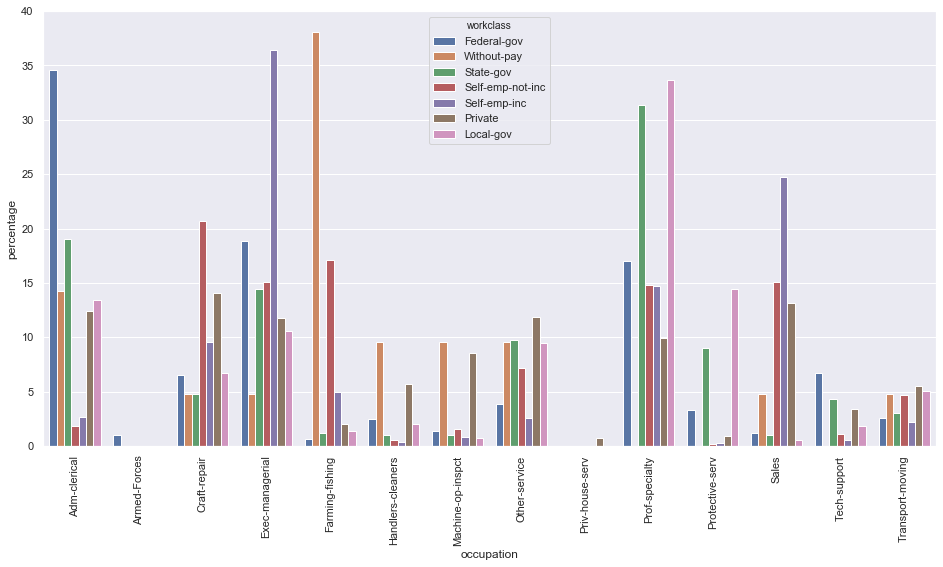

In [40]:
plt.figure(figsize=(16, 8))
gp_in=data.groupby(['workclass'])['occupation']
occp_counts = (gp_in.value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('occupation'))
chart = sns.barplot(x="occupation", y="percentage", hue="workclass", data=occp_counts)
_ = plt.setp(chart.get_xticklabels(), rotation=90)
print('% distribution of occupation based upon workclass:')
pd.crosstab(data.workclass,data.occupation,normalize='index').apply(lambda i:i*100)

### Observation_26:
* Most people who are without pay (38.09%) are in Farming-fishing occupation.
* Federal-gov provides most jobs in Adm-executive (34.57%)
* Armed-forces are completely under control of Federal-gov.
* Prof-speciality is highly govt controlled.
* The private sector distributed in each class but does not dominate any class. Hence preventing monopoly of private companies.

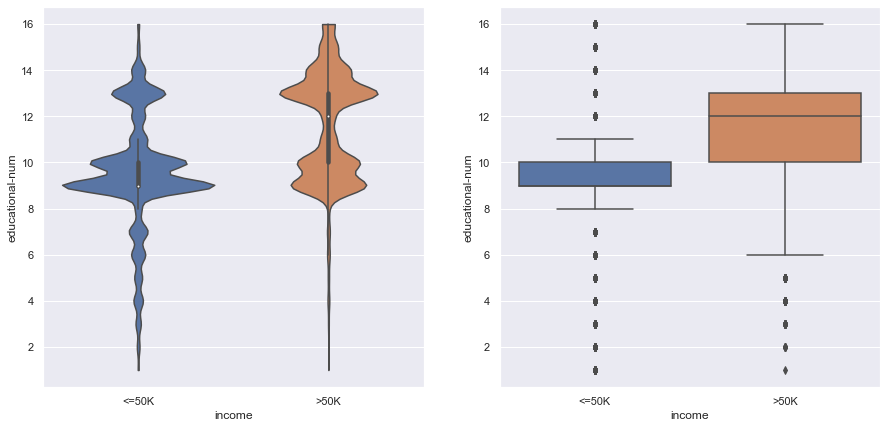

In [41]:
f, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.violinplot(data=data,x='income',y='educational-num',cut=0)
plt.subplot(1,2,2)
sns.boxplot(data=data,x='income',y='educational-num')

In [42]:
np.mean(data['educational-num'])

10.118460041572686

### Observation_27:
* From the plot we can say that most people with higher than avg educational-num are having >50k salary.
* While below avg educational-num is more profound in <=50k.

<b>4.5 Capital-gain & capital-loss:</b>

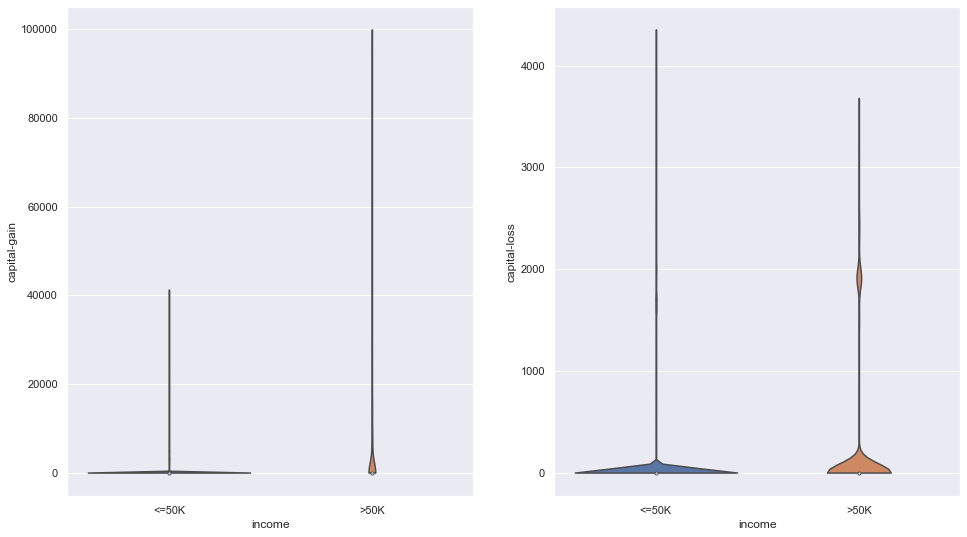

In [43]:
f, axs = plt.subplots(1,2,figsize=(16,9))
plt.subplot(1,2,1)
sns.violinplot(data = data, y = 'capital-gain', x='income',cut=0)
plt.subplot(1,2,2)
sns.violinplot(data = data, y = 'capital-loss', x='income',cut=0)

### Observations_28:
* Most of the values lies on zero for both cases. Meaning no capital-gain or loss. However there is some profit for each income[for outliers] (also y axis for loss is much smaller than that of gain, meaning high profit).
* The people with income >50k have more profit than their counterpart.

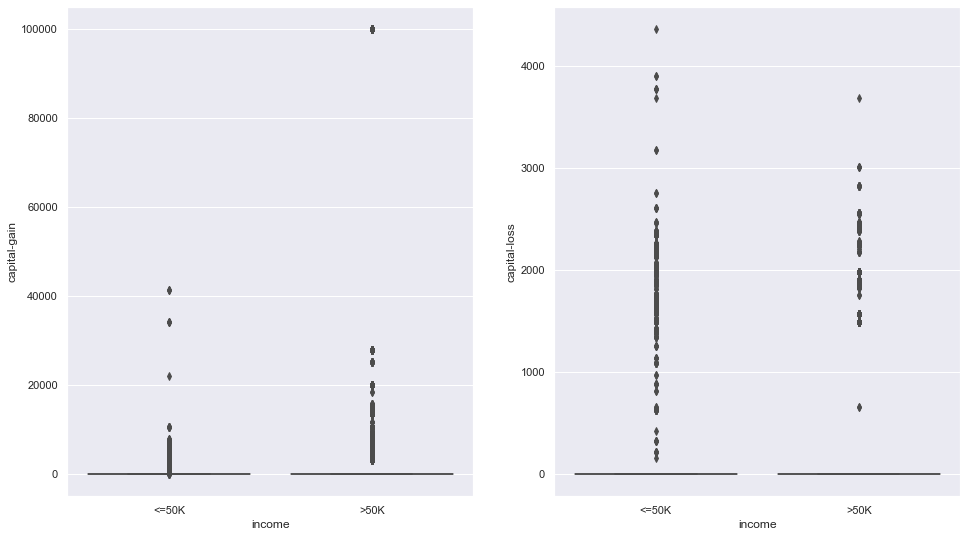

In [44]:
f, axs = plt.subplots(1,2,figsize=(16,9))
plt.subplot(1,2,1)
sns.boxplot(data = data, y = 'capital-gain', x='income')
plt.subplot(1,2,2)
sns.boxplot(data = data, y = 'capital-loss', x='income')

### Observations_29:
* All the non-zero gain and loss values are statistically outliers. The IQR for both, gain & loss is 0.

# 5. Conclusion:
Some major Observations:
* Most people in this data are white US people.
* There is a high possibility that gender discrimination existed when it came to income of female workers.
* Most jobs were acquired by private compaies but still their distribution across each workclass is such that chances of monopoly were quite low.
* Most of the >50k pay was taken by married-civ-spouses.
* Exec-managerial & Prof-speciality occupation has most chances of getting >50k income.
* People without-pay were mostly consisted of Farming-fishing people.
* People with higher educational-num (aprrox >10) are more likely to get >50k income.

# Feature Transform:(first step in ML)

Althogh we already know datatypes but just to for the sake of ref:

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   education        45222 non-null  object
 3   educational-num  45222 non-null  int64 
 4   marital-status   45222 non-null  object
 5   occupation       45222 non-null  object
 6   relationship     45222 non-null  object
 7   race             45222 non-null  object
 8   gender           45222 non-null  object
 9   capital-gain     45222 non-null  int64 
 10  capital-loss     45222 non-null  int64 
 11  hours-per-week   45222 non-null  int64 
 12  native-country   45222 non-null  object
 13  income           45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 6.4+ MB


<b>1. Dealing with Numeric Variables:</b>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FB7D835C8>,
      dtype=object)

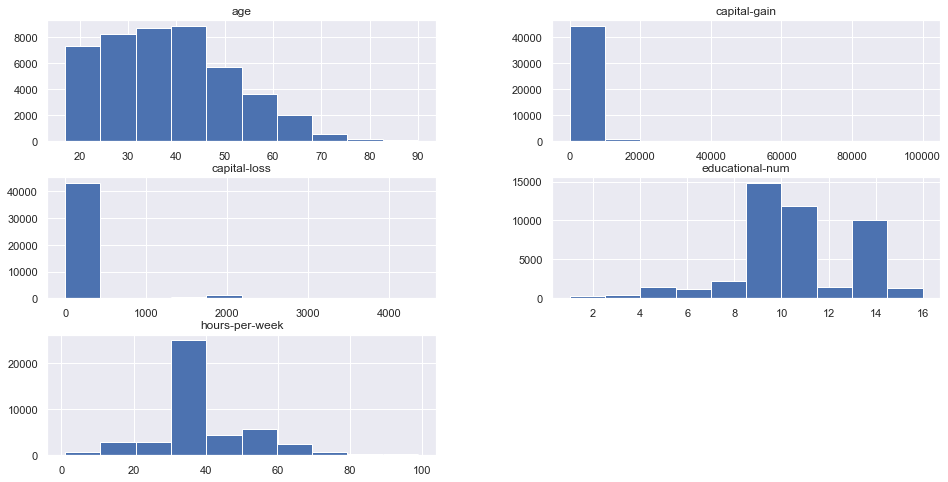

In [46]:
# just to check type of numerical var
data[data.dtypes[(data.dtypes=="int64")].index.values].hist(figsize=[16,8])

### Observation_30:
* <b>Continuous:</b> age, hours-per-week,capital-gain,capital-loss
* <b>Ordinal:</b> Educational-num

Now let's do feature transform

In [47]:
# for the sake of simplicity taking educational-num in cont
# performing MinMaxScalar on age instead of binning for simplicity
from sklearn import preprocessing
n_test = data[['educational-num','hours-per-week','capital-gain','age','capital-loss']] #list of test data
cols_to_norm = ['educational-num','hours-per-week','capital-gain','age','capital-loss'] #cols to normalize
x = n_test.values
mm_scaler = preprocessing.MinMaxScaler()
x_scaled = mm_scaler.fit_transform(x)
n_test = pd.DataFrame(x_scaled, columns=cols_to_norm)
l_test = data.drop(['educational-num','hours-per-week','capital-gain','age','capital-loss'], axis=1)
data = pd.concat([n_test, l_test], axis=1)
data.columns

Index(['educational-num', 'hours-per-week', 'capital-gain', 'age',
       'capital-loss', 'workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'native-country',
       'income'],
      dtype='object')

<b>2. Dealing with categorical var</b>

In [48]:
dummy_cols = ['gender','income','race','workclass','occupation','marital-status','relationship','native-country','education']
data = pd.get_dummies(data, columns = dummy_cols)

In [49]:
data.shape

(48561, 105)

In [50]:
data.head()

,educational-num,hours-per-week,capital-gain,age,capital-loss,gender_Female,gender_Male,income_<=50K,income_>50K,race_Amer-Indian-Eskimo,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,0.400000,0.397959,0.000000,0.109589,0.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.533333,0.500000,0.000000,0.287671,0.0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.733333,0.397959,0.000000,0.150685,0.0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0.600000,0.397959,0.076881,0.369863,0.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0.333333,0.295918,0.000000,0.232877,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
data.dropna(axis=0, how='any',inplace= True) #removing unknown columns

In [52]:
data.shape

(45222, 105)

In [53]:
(48561-45222)/48561*100 # percentage of newly gen rows with NaN value

6.875888058318404

In [55]:
data.describe() # no need to write include all

,educational-num,hours-per-week,capital-gain,age,capital-loss,gender_Female,gender_Male,income_<=50K,income_>50K,race_Amer-Indian-Eskimo,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.00000,45222.000000,45222.000000,45222.000000,45222.000000,...,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,0.607897,0.407531,0.011014,0.295177,0.020339,0.30096,0.625205,0.697205,0.228959,0.008956,...,0.013799,0.030560,0.039848,0.155544,0.011211,0.303503,0.051369,0.001482,0.015833,0.201981
std,0.170192,0.122526,0.075065,0.181067,0.092965,0.45868,0.484075,0.459472,0.420168,0.094212,...,0.116655,0.172125,0.195604,0.362426,0.105290,0.459775,0.220751,0.038463,0.124831,0.401483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.533333,0.397959,0.000000,0.150685,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.397959,0.000000,0.273973,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,0.448980,0.000000,0.410959,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Observations_31:
* The first step standardized for numerical data using MinMaxScalar.
* For categorical data, we used dummy variables. So our toal columns became 105.
* New data had 6.88% rows with NaN values. So we removed those rows. We got 45222 rows in final data (equal to the data we started with after dealing with missing values).

# <c>The End!</c>